In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


### My first dataset in kaggle

In [2]:
# Importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing the csv file
df = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')

In [4]:
# Checking the first five rows of the dataset
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# Checking the shape of the dataset
df.shape

(303, 14)

In [6]:
# Checking the basic overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# Checking for null values in the dataset
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

We can see that, there are no null values in our dataset

In [8]:
# Checking if there are null values in the form of question mark
df[df=='?'].count()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

We can see that there are no question marks as well.

In [9]:
# The categorical columns in the dataset, except the target variable are these
df_cat = df[['sex','exng','caa','cp','fbs','restecg','slp','thall']]

In [10]:
# Changing the datatypes of the categorical variables which are coded
df['sex'] = df['sex'].astype('object')
df['exng']=df['exng'].astype('object')
df['caa']=df['caa'].astype('object')
df['cp'] = df['cp'].astype('object')
df['fbs']= df['fbs'].astype('object')
df['restecg'] = df['restecg'].astype('object')
df['slp'] = df['slp'].astype('object')
df['thall'] = df['thall'].astype('object')
df['output'] = df['output'].astype('object')

In [11]:
# The numerical columns in the dataset are these
df_num = df[['age','trtbps','chol','thalachh','oldpeak']]

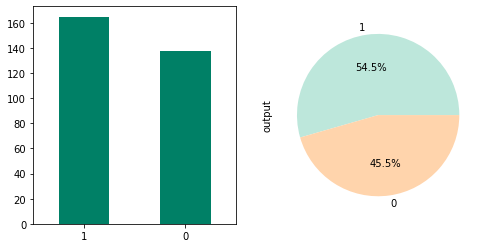

In [12]:
# Checking for the percentage of output column
plt.rcParams['figure.figsize'] = 8,4
fig,ax = plt.subplots(1,2)
df['output'].value_counts().plot(kind='bar',rot=0, cmap='summer',ax=ax[0])
df['output'].value_counts().plot(kind='pie',cmap='icefire',ax=ax[1],autopct='%.1f%%')
plt.show()

We can see that there is no imbalance in our dataset.

So, we could see from our target variable that , there are more number of people, that is around 54% of people have high chances of having a heart attack.
Let's see how it is getting affected based on the other features.

In [13]:
# Five point summary of numerical columns
df_num.describe()

,age,trtbps,chol,thalachh,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


We can see that, age is varying between 29 and 77. The mean and median are moreover equal, so age is not skewed.

The bp level varies between 94 and 200. We can observe that few people have very high bp, but the mean is normal.

We can see that cholestrol varies between 126 and 564. The mean and median are different
So, we can tell that chol distribution is skewed. And also the standard deviation value is very high,
so there can be outliers in this column.

The thalachh column is varying between 71 to 202. We can observe that, few people are 
having very high heart beat rates, which could be risky. The mean and median are also very much different, so the column is skewed.
The mean is little higher than usual.

Old peak is between 0 and 6.2 , there is not much info given about this feature.
But we can tell from mean and median that , it is skewed.



**Univariate Analysis**

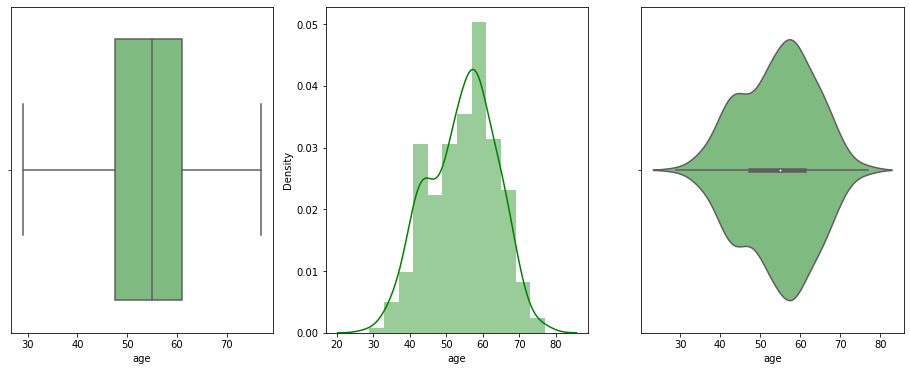

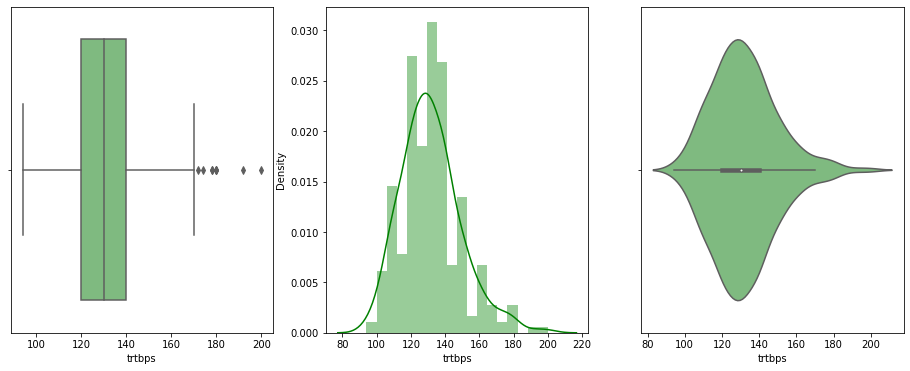

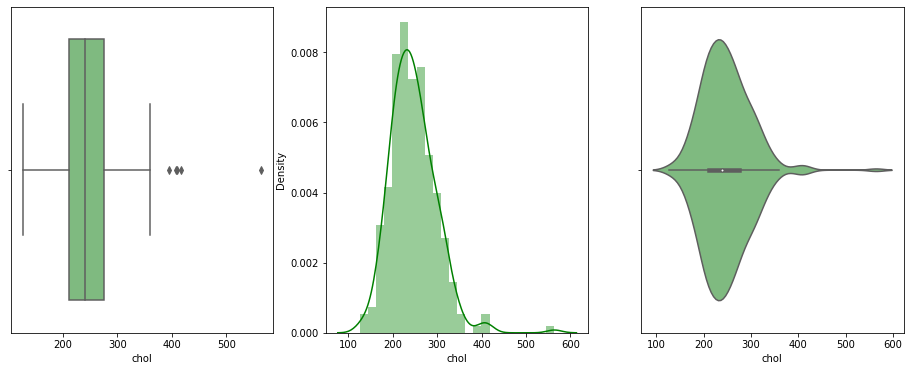

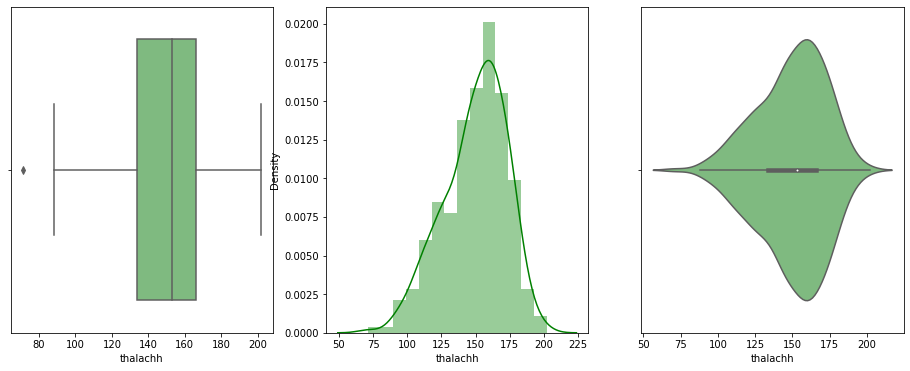

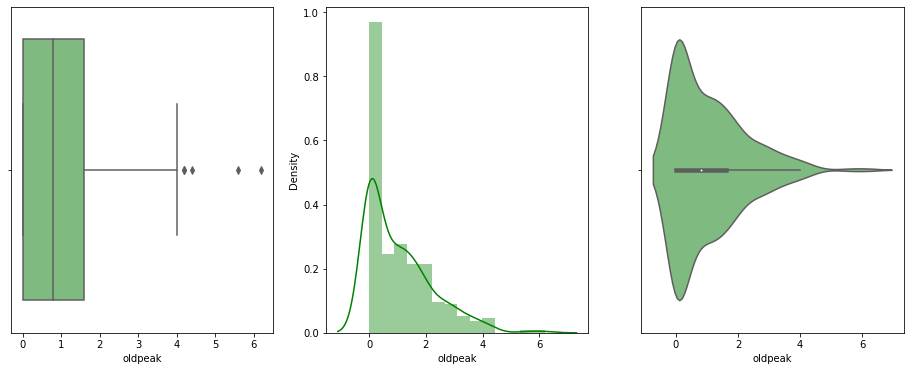

In [14]:
# Checking the distribution of the numerical columns
plt.rcParams['figure.figsize']= 16,6
i=1
for col in df_num:
    fig,ax= plt.subplots(1,3)
    sns.boxplot(df_num[col],ax=ax[0],palette='Greens_r')
    sns.distplot(df_num[col],ax=ax[1],color='green')
    sns.violinplot(df_num[col],ax=ax[2],palette='Greens_r')
    i+=1
    plt.show()

We can see in the Age column that, there are more number of people in the age group of
50-60.

We can see in the trtbps column that, most people's bp is in the range between 120 and 140
which is the normal range, but there are also plenty of people with high bp value

Most of the people have cholestrol in the range 200-300 which is little high than normal cholestrol value
But since most of the data is about 50-70 age people, this is the trend we are getting

The thalachh column is having a peak between the range 150-175
which is high for people of the age group 50-70

People with value 0 of old peak is more compared to other values.

We can see that, the numerical columns trtbps, chol, thalachh and oldpeak has outliers. It will not be wise to drop the outliers so we can transform them.


 sex :


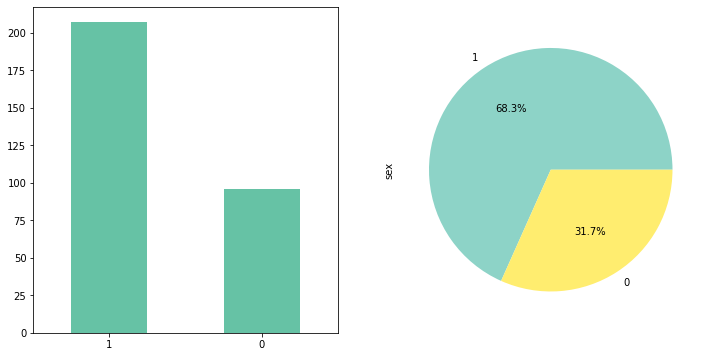


 exng :


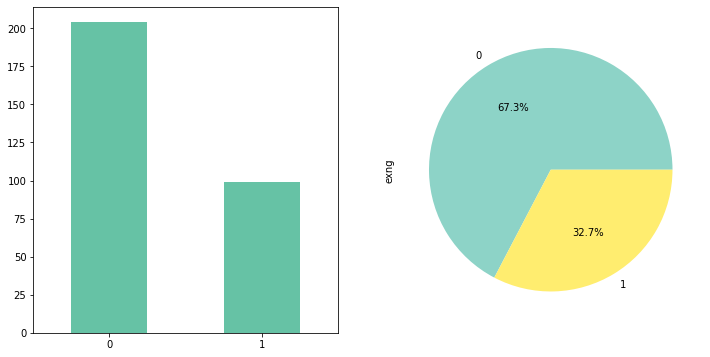


 caa :


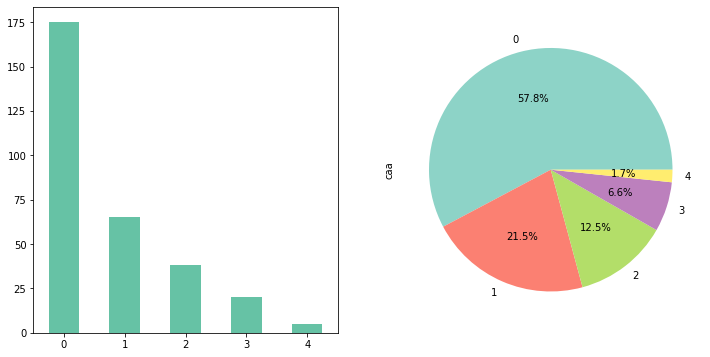


 cp :


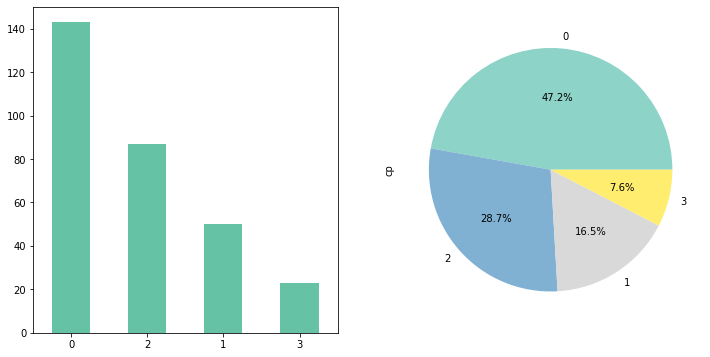


 fbs :


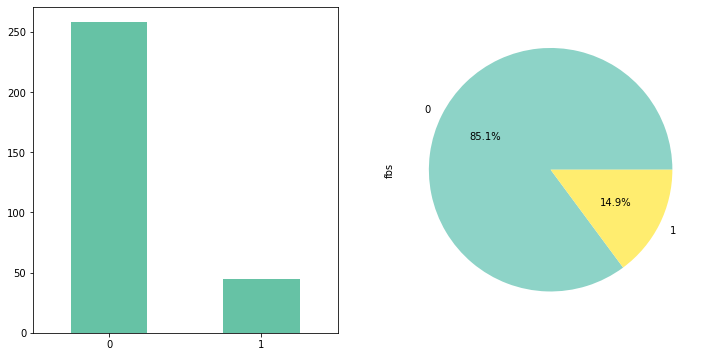


 restecg :


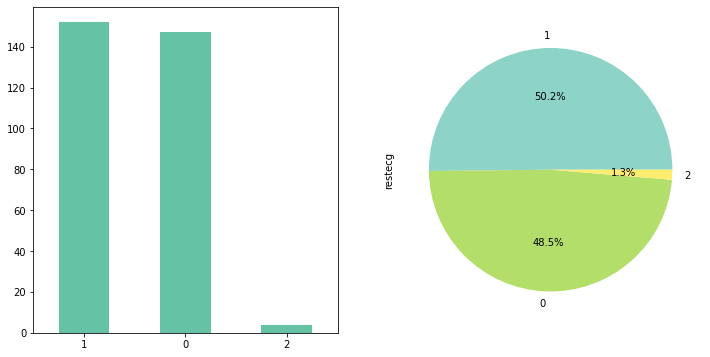


 slp :


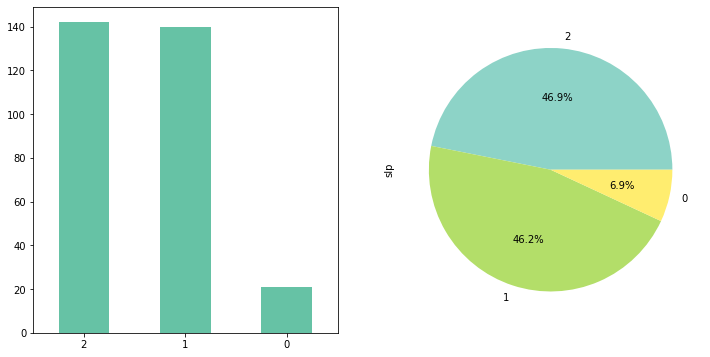


 thall :


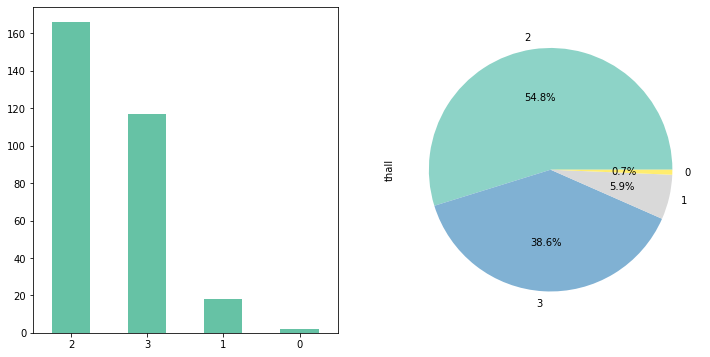

In [15]:
# Univariate analysis of categorical features
plt.rcParams['figure.figsize']= 12,6
for col in df_cat:
    print('\n',col,':')
    fig,ax = plt.subplots(1,2)
    df_cat[col].value_counts().plot(kind='bar',ax=ax[0],rot=0, cmap='Set2')
    df_cat[col].value_counts().plot(kind='pie',autopct='%.1f%%',ax=ax[1], cmap='Set3')
    plt.show()
plt.show()

In the sex column, we do not know which is Male and which is female
We have data more about gender type 1 compared to gender type 2
Gender type 1 is more than double gender type 2

In the exercise induced angina column, we can see that only very less percentage of people
32 % of them has got pain in the chest due to some physical activity

In the caa column, we can see 0th value of caa is taking more than 50%

In the cp column, we see that around 50% percentage of people have typical angina

The fasting blood sugar column says, around 85% of people's blood sugar is normal
and only 15% of people have fasting blood sugar higher than normal value

From restecg, we see that, around 50% of the people's ecg is normal

In slp column , the values 1 and 2 are contributing more

The thallium stress test tells that the value 2 is more compared to other values

#### Bivariate Analysis

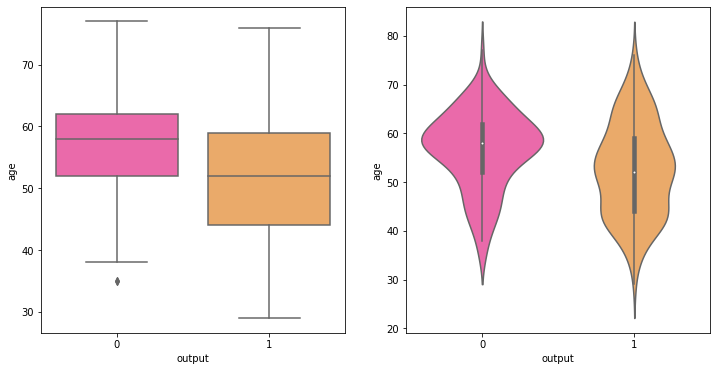

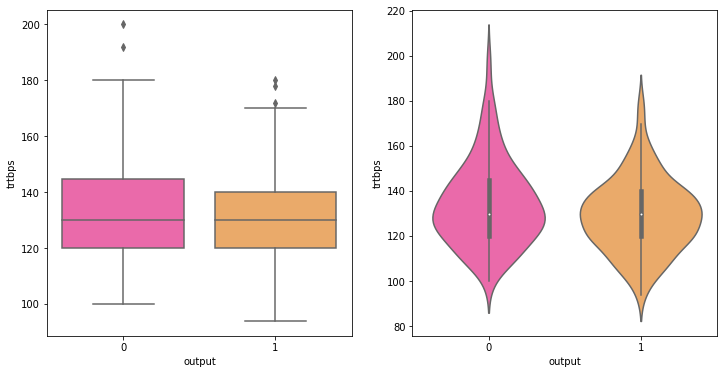

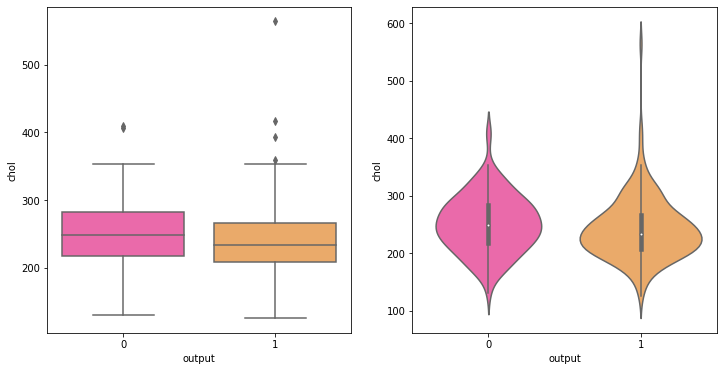

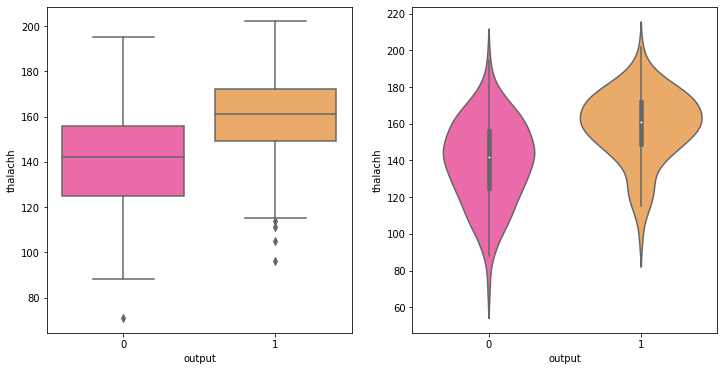

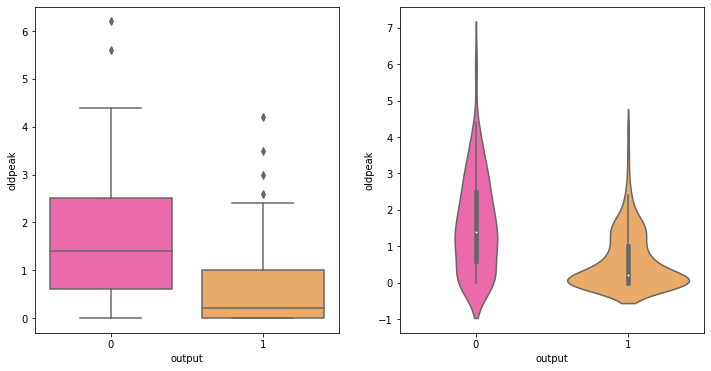

In [16]:
# Numerical columns with output
for col in df_num:
    fig,ax= plt.subplots(1,2)
    sns.boxplot(df['output'], df_num[col],ax=ax[0],palette='spring')
    sns.violinplot(df['output'], df_num[col],ax=ax[1],palette='spring')
    plt.show()

When comparing age with the output we can see an anomaly that
People between age 50-65 have less chances of getting a heart attack
Whereas, for having chances of getting heart attack, it is uniformly distributed
for all the ages between 40-70.

With trtbps with output, we can see that people with high bp have less
chances of getting heart attack, whereas, those with bp between 120 and
140 are having higher chances.

From cholestrol with output distribution we can see that, the people
with high cholestrol, that is more than 400 are surely having chances 
of getting heart attack

When comparing thalachh with output we can see that, people with less heart rates
have very less chances of getting heart attack, and similarly the people with higher
heart rates are having more chances of getting heart attack

From old peak with output we can see that, the people with old peak value 0 are
having more chances of getting heart attack, also we can see that, as old peak value
increases, the chance of getting heart attack is reduced.

sex Vs output:


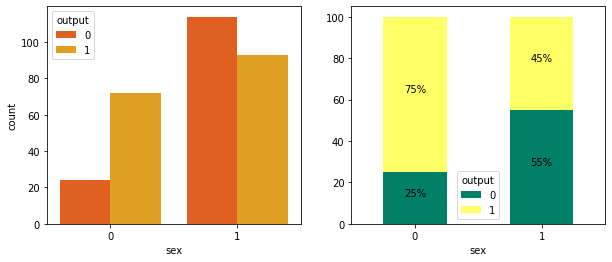

exng Vs output:


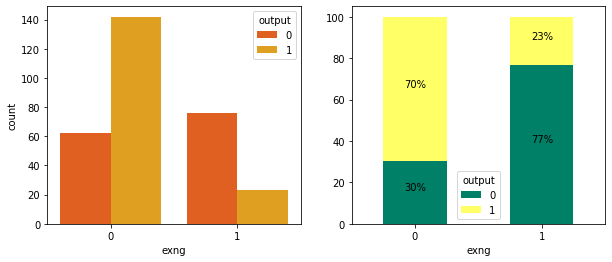

caa Vs output:


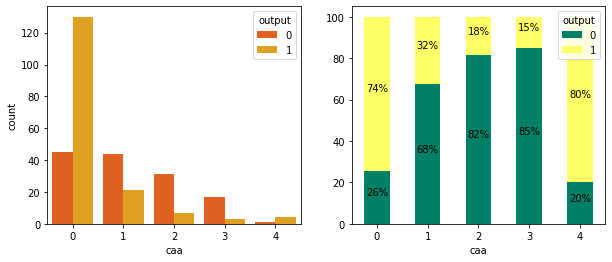

cp Vs output:


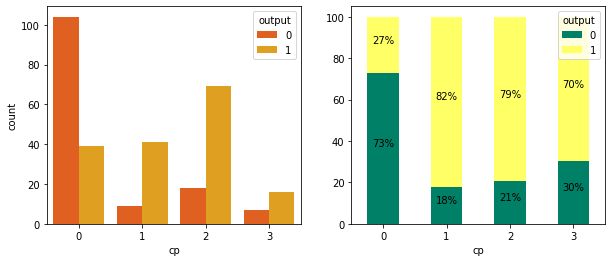

fbs Vs output:


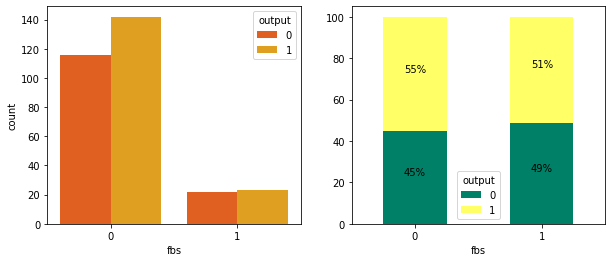

restecg Vs output:


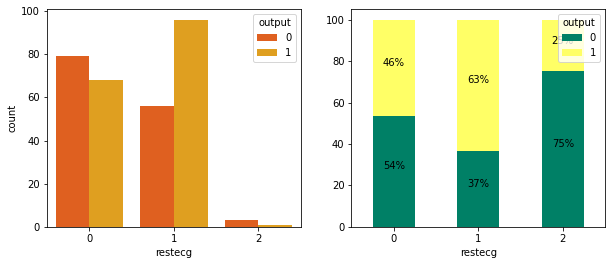

slp Vs output:


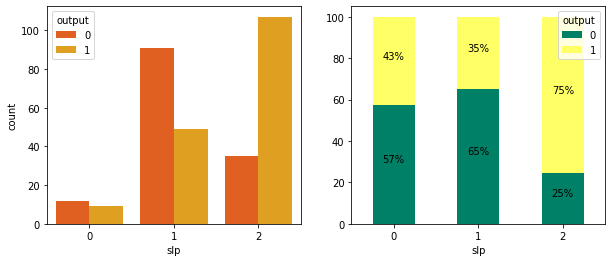

thall Vs output:


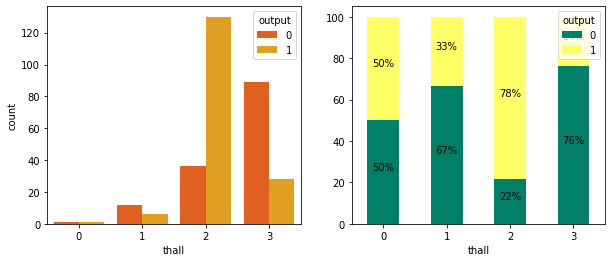

In [17]:
# Categorical columns with Output
plt.rcParams['figure.figsize']= 10,4
for col in df_cat:
    print(col,'Vs','output:')
    fig,ax = plt.subplots(1,2)
    sns.countplot(df_cat[col],hue= df['output'],ax=ax[0],palette='autumn')
    ax_1= pd.crosstab(df_cat[col],df['output']).apply(lambda r: r/r.sum()*100, axis=1).plot(kind='bar',stacked=True,ax=ax[1],rot=0,cmap='summer')
    for rec in ax_1.patches:
        height = rec.get_height()
        ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')
    plt.show()

When comparing sex with the output, we can see that, the gender 0 is having 
very high chance of getting heart attack, while the gender 1 is having around 50% 
chance of getting the heart attack

Comparing exng with output, we can see an anomaly that, of the people who does
not get pain due to physical activity are having more chance of getting the heart attack

The caa with output is also having an anomaly, when the number of vessels is very less
that is when 0, the chances of getting heart attack are around 75% and also
when the number of major vessels is 4, there is 80% chance for getting heart attack
The intermediate number of vessels are having less percentage of people getting heart attack

We can see from cp that, the atypical angina is having more than 80% of people getting heart attack
Followed by people with non-anginal and asymptomatic, where both of them are having
more than 70% chance of getting heart attack

The fasting blood sugar is not seeming to have an effect on output, as 
people with blood sugar and also people without blood sugar is also having
almost equal chances of getting heart attack

When comparing restecg with output, we can see that, people with normal ecg 
is also having around 46% chances of getting heart attack. Also, when there is abnormality
in the restecg, there is around 63% chance of getting heart attack.

While comparing slp with output, we can see that, the slp value 2 is having very high
chance of getting heart attack, the other two slope values too have some significant
chance of getting heart attack

From thallium stress test result we can see that, the value 2 is having 78% chance
of getting heart attack and also value 0 is having 50% chance, the other two values
are having less chances.

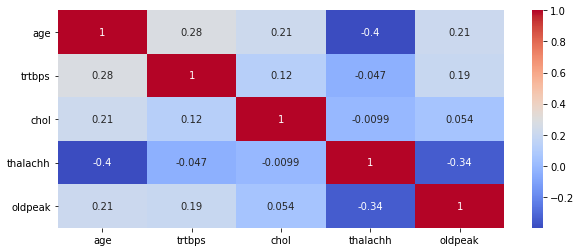

In [18]:
# Correlation plot
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')
plt.show()

There is no multicollinearity between the features.


### Hypothesis testings

#### Categorical Features
Null hypothesis: The feature does not have effect on Output

Alternate hypothesis: The feature has an effect on Output

In [19]:
from scipy.stats import chi2_contingency
for col in df_cat:
    print(col,'Vs','Output')
    print(chi2_contingency(pd.crosstab(df_cat[col],df['output'])))
    print('\n')

sex Vs Output
(22.717227046576355, 1.8767776216941503e-06, 1, array([[ 43.72277228,  52.27722772],
       [ 94.27722772, 112.72277228]]))


exng Vs Output
(55.94454996665093, 7.454409331235655e-14, 1, array([[ 92.91089109, 111.08910891],
       [ 45.08910891,  53.91089109]]))


caa Vs Output
(74.36663061195097, 2.712470211959332e-15, 4, array([[79.7029703 , 95.2970297 ],
       [29.6039604 , 35.3960396 ],
       [17.30693069, 20.69306931],
       [ 9.10891089, 10.89108911],
       [ 2.27722772,  2.72277228]]))


cp Vs Output
(81.68642755194445, 1.3343043373050064e-17, 3, array([[65.12871287, 77.87128713],
       [22.77227723, 27.22772277],
       [39.62376238, 47.37623762],
       [10.47524752, 12.52475248]]))


fbs Vs Output
(0.10627276301947715, 0.7444281114149577, 1, array([[117.5049505, 140.4950495],
       [ 20.4950495,  24.5049505]]))


restecg Vs Output
(10.023091785081, 0.006660598773498031, 2, array([[66.95049505, 80.04950495],
       [69.22772277, 82.77227723],
       [ 1.821

So, fbs column does not have an effect on the output column, so we can drop it.

In [20]:
df = df.drop('fbs',axis=1)

Normality test

Null hypothesis: Data is not skewed; skewness=0

Alternate hypothesis: Data is skewed; skewness!=0

In [21]:
# For the numerical features, we first perform the shapiro test
import scipy.stats as st
from scipy.stats import shapiro
for i in df_num:
    print(i,'Vs','output')
    st1= df[df['output']==0][i]
    st2= df[df['output']==1][i]
    print(shapiro(st1))
    print(shapiro(st2))
    print('\n')

age Vs output
ShapiroResult(statistic=0.9686173796653748, pvalue=0.002868534531444311)
ShapiroResult(statistic=0.9867703914642334, pvalue=0.12112646549940109)


trtbps Vs output
ShapiroResult(statistic=0.9510930180549622, pvalue=8.36556137073785e-05)
ShapiroResult(statistic=0.9786458015441895, pvalue=0.01190413162112236)


chol Vs output
ShapiroResult(statistic=0.9894232749938965, pvalue=0.3792019188404083)
ShapiroResult(statistic=0.8984674215316772, pvalue=3.0788867011466436e-09)


thalachh Vs output
ShapiroResult(statistic=0.9899680018424988, pvalue=0.4253460764884949)
ShapiroResult(statistic=0.9657073020935059, pvalue=0.0004197754606138915)


oldpeak Vs output
ShapiroResult(statistic=0.9320630431175232, pvalue=3.3078715659939917e-06)
ShapiroResult(statistic=0.7694748044013977, pvalue=7.917484620397278e-15)




Numerical Columns

Null hypothesis: The feature does not have an effect on Output

Alternate hypothesis: The feature has an effect on Output

In [22]:
from scipy.stats import mannwhitneyu
for i in df_num:
    z=df[df['output']==1][i]
    w=df[df['output']==0][i]
    print('ManwhitneyU test for %s with admit pvalue is:'%i,mannwhitneyu(z,w)[1])
    print('\n')

ManwhitneyU test for age with admit pvalue is: 1.7192551591614497e-05


ManwhitneyU test for trtbps with admit pvalue is: 0.01732622263010252


ManwhitneyU test for chol with admit pvalue is: 0.017857591005688223


ManwhitneyU test for thalachh with admit pvalue is: 4.898277528257624e-14


ManwhitneyU test for oldpeak with admit pvalue is: 1.203489344347167e-13




So, other than fbs all the other columns has an effect on the target variable. So, we can build the model.

In [23]:
# Transformation
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
for i in df.select_dtypes(np.number):
    df[i]= pt.fit_transform(df[[i]])

### Model Building

In [24]:
for i in df.columns:
    df[i]=df[i].astype('int64')

In [25]:
X = df.drop('output',axis=1)
y = df['output']

In [26]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(X,y,test_size=0.3,random_state=42)

In [27]:
xtrain.shape , xtest.shape , ytrain.shape , ytest.shape

((212, 12), (91, 12), (212,), (91,))

In [28]:
# Scaling the train and test set seperately
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
for i in xtrain.columns:
    xtrain[i] = sc.fit_transform(xtrain[[i]])
for i in xtest.columns:
    xtest[i] = sc.fit_transform(xtest[[i]])

In [29]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve, recall_score, f1_score, accuracy_score, precision_score

In [30]:
def models(model,xtrain,xtest,ytrain,ytest):
    md = model.fit(xtrain,ytrain)
    ypred = md.predict(xtest)
    yprob = md.predict_proba(xtest)[:,1]
    print(classification_report(ytest,ypred))
    print('Train Accuracy:', md.score(xtrain,ytrain),'\nTest Accuracy',md.score(xtest,ytest))
    print('AUC Score:', roc_auc_score(ytest,yprob))
    print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))

In [31]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='sag')
models(lr,xtrain,xtest,ytrain,ytest)

              precision    recall  f1-score   support

           0       0.84      0.76      0.79        41
           1       0.81      0.88      0.85        50

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91

Train Accuracy: 0.8537735849056604 
Test Accuracy 0.8241758241758241
AUC Score: 0.8673170731707318
Confusion Matrix:
 [[31 10]
 [ 6 44]]


In [32]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']}]
gs= GridSearchCV(LogisticRegression(),
                      param_grid = param_grid,
                      cv=3,
                      n_jobs=-1,
                      verbose=3)
gs.fit(xtrain,ytrain)
print('Best parameters for Decision Tree Classifier: ', gs.best_params_, '\n')

Fitting 3 folds for each of 40 candidates, totalling 120 fits
Best parameters for Decision Tree Classifier:  {'C': 0.0001, 'penalty': 'l2', 'solver': 'liblinear'} 



In [33]:
lr_t = LogisticRegression(C=0.0001,penalty='l2',solver='liblinear')
models(lr_t,xtrain,xtest,ytrain,ytest)

              precision    recall  f1-score   support

           0       0.85      0.80      0.83        41
           1       0.85      0.88      0.86        50

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91

Train Accuracy: 0.839622641509434 
Test Accuracy 0.8461538461538461
AUC Score: 0.8829268292682927
Confusion Matrix:
 [[33  8]
 [ 6 44]]


In [34]:
# KNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
models(knn,xtrain,xtest,ytrain,ytest)

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        41
           1       0.82      0.82      0.82        50

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91

Train Accuracy: 0.8632075471698113 
Test Accuracy 0.8021978021978022
AUC Score: 0.8785365853658537
Confusion Matrix:
 [[32  9]
 [ 9 41]]


In [35]:
from sklearn.model_selection import GridSearchCV
g= {'n_neighbors' : range(2,20)}
gs= GridSearchCV(KNeighborsClassifier(),
                      param_grid =g,
                      cv=3,
                      n_jobs=-1,
                      verbose=3)
gs.fit(xtrain,ytrain)
print('Best parameters for Decision Tree Classifier: ', gs.best_params_, '\n')

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best parameters for Decision Tree Classifier:  {'n_neighbors': 19} 



In [36]:
knn_t = KNeighborsClassifier(n_neighbors=19)
models(knn_t,xtrain,xtest,ytrain,ytest)

              precision    recall  f1-score   support

           0       0.86      0.73      0.79        41
           1       0.80      0.90      0.85        50

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91

Train Accuracy: 0.8443396226415094 
Test Accuracy 0.8241758241758241
AUC Score: 0.8824390243902439
Confusion Matrix:
 [[30 11]
 [ 5 45]]


In [37]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
models(dt,xtrain,xtest,ytrain,ytest)

              precision    recall  f1-score   support

           0       0.67      0.80      0.73        41
           1       0.81      0.68      0.74        50

    accuracy                           0.74        91
   macro avg       0.74      0.74      0.74        91
weighted avg       0.75      0.74      0.74        91

Train Accuracy: 0.9952830188679245 
Test Accuracy 0.7362637362637363
AUC Score: 0.7504878048780488
Confusion Matrix:
 [[33  8]
 [16 34]]


In [38]:
# Finding best parameters from randomized search cv to avoid overfitting
from sklearn.model_selection import GridSearchCV
g= {'criterion': ['entropy', 'gini'],
                     'max_depth': range(2, 20),
                     'min_samples_split': range(2,10)}
gs= GridSearchCV(DecisionTreeClassifier(),
                      param_grid =g,
                      cv=3,
                      n_jobs=-1,
                      verbose=3)
gs.fit(xtrain,ytrain)
print('Best parameters for Decision Tree Classifier: ', gs.best_params_, '\n')

Fitting 3 folds for each of 288 candidates, totalling 864 fits
Best parameters for Decision Tree Classifier:  {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2} 



In [39]:
dt_t = DecisionTreeClassifier(min_samples_split=2, max_depth=3,criterion='entropy')
models(dt_t,xtrain,xtest,ytrain,ytest)

              precision    recall  f1-score   support

           0       0.79      0.76      0.77        41
           1       0.81      0.84      0.82        50

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91

Train Accuracy: 0.8632075471698113 
Test Accuracy 0.8021978021978022
AUC Score: 0.8602439024390244
Confusion Matrix:
 [[31 10]
 [ 8 42]]


In [40]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
models(rf,xtrain,xtest,ytrain,ytest)

              precision    recall  f1-score   support

           0       0.76      0.85      0.80        41
           1       0.87      0.78      0.82        50

    accuracy                           0.81        91
   macro avg       0.81      0.82      0.81        91
weighted avg       0.82      0.81      0.81        91

Train Accuracy: 0.9952830188679245 
Test Accuracy 0.8131868131868132
AUC Score: 0.896829268292683
Confusion Matrix:
 [[35  6]
 [11 39]]


In [41]:
# Ada Boost Classifier
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()
models(adb,xtrain,xtest,ytrain,ytest)

              precision    recall  f1-score   support

           0       0.76      0.85      0.80        41
           1       0.87      0.78      0.82        50

    accuracy                           0.81        91
   macro avg       0.81      0.82      0.81        91
weighted avg       0.82      0.81      0.81        91

Train Accuracy: 0.8773584905660378 
Test Accuracy 0.8131868131868132
AUC Score: 0.8721951219512195
Confusion Matrix:
 [[35  6]
 [11 39]]


In [42]:
final = pd.DataFrame({'Models':['Logistic Regression','KNeighborsClassifier' ,'AdaBoostClassifier','DecisionTreeClassifier']
                     ,'Accuracy':[accuracy_score(ytest,lr_t.predict(xtest)),accuracy_score(ytest,knn_t.predict(xtest))
                                 ,accuracy_score(ytest,adb.predict(xtest)),accuracy_score(ytest,dt_t.predict(xtest))]
                     ,'AUC Score':[roc_auc_score(ytest,lr_t.predict_proba(xtest)[:,1]),roc_auc_score(ytest,
                                                                                                    knn_t.predict_proba(xtest)[:,1])
                                  , roc_auc_score(ytest,adb.predict_proba(xtest)[:,1]), roc_auc_score(ytest,dt_t.predict_proba(xtest)[:,1])]
                     ,'Recall Score':[recall_score(ytest,lr_t.predict(xtest)), recall_score(ytest,knn_t.predict(xtest))
                                     ,recall_score(ytest,adb.predict(xtest)), recall_score(ytest,dt_t.predict(xtest))]
                      ,'Precision Score':[precision_score(ytest,lr_t.predict(xtest)), precision_score(ytest,knn_t.predict(xtest))
                                     ,precision_score(ytest,adb.predict(xtest)), precision_score(ytest,dt_t.predict(xtest))]
                     ,'F1 Score':[f1_score(ytest,lr_t.predict(xtest)), f1_score(ytest,knn_t.predict(xtest))
                                     ,f1_score(ytest,adb.predict(xtest)),precision_score(ytest,dt_t.predict(xtest))]
                     })
final

,Models,Accuracy,AUC Score,Recall Score,Precision Score,F1 Score
0,Logistic Regression,0.846154,0.882927,0.88,0.846154,0.862745
1,KNeighborsClassifier,0.824176,0.882439,0.90,0.803571,0.849057
2,AdaBoostClassifier,0.813187,0.872195,0.78,0.866667,0.821053
3,DecisionTreeClassifier,0.802198,0.860244,0.84,0.807692,0.807692


In [43]:
feat_imp = pd.DataFrame(columns={'Features':X.columns,'Importance': dt_t.feature_importances_})

In [44]:
important_features = pd.DataFrame({'Features': xtrain.columns, 
                                   'Importance': adb.feature_importances_})

# print the dataframe
important_features.sort_values(by='Importance', ascending=False, inplace=True)
important_features

,Features,Importance
10,caa,0.24
2,cp,0.18
9,slp,0.10
1,sex,0.08
6,thalachh,0.08
8,oldpeak,0.08
11,thall,0.08
0,age,0.06
5,restecg,0.06
7,exng,0.04


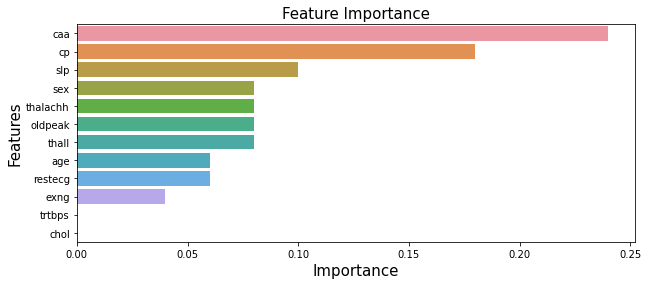

In [45]:
sns.barplot(x = 'Importance', y = 'Features', data = important_features)
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.show()

We can see from the feature importance graph that, the caa feature is having more influence in the output column followed by cp and slp, sex and thalachh features. Even old peak,thall, age,restecg, exng seems to have some effect on Output. The trtbps and chol are not influencing the output feature much. 

We saw from bivariate that when the number of major vessels(caa value) is too small and when too large it was having more chances of getting heart attack. Also the chest pain type is having high influence on Output, so whether the person will get heart attack or not is mainly determined by the number of major vessels and the type of chest pain that person gets.

The slp value is also having very high influence and an interesting feature is the sex feature, where we saw from bivariate analysis that the gender type 1 is specifically having more chances of getting heart attack.

The normal heart rate is also influencing very much, we saw that when that person is having higher heart rate then that person has more chances of getting heart attack and we also saw that when the heart rate is very less, then that person does not have a chance of getting heart attack at all.

So, any health industry should focus on these 4 features to determine if the person will get heart attack or not.